In [1]:
from parseMD import Universe,Atom,compute_frame_from_atom,_prepared
from universe import *
import pandas as pd
from SRparse import *

In [ ]:
#u,vel = PARSE_MD(PDtraj_dir,ParseDynamics)
%run dynpy.py --SRrelax dynpy_params.py

List of trajectories not provided. All will be parsed...
The following directories will be parsed as trajectories:
../jerschow-trajectories/01



Continue? (Y/n) 


In [2]:
#from dynpy_params import ParseDynamics as PD

In [3]:
import pandas as pd
import numpy as np
#pos_grouped = pd.read_csv("./example-data/tinker/methane/pos_grouped.csv")
#vel_grouped = pd.read_csv("./example-data/tinker/methane/vel_grouped.csv")
#bonds_grouped = pd.read_csv("./example-data/tinker/methane/bonds_grouped.csv")
mol_ax = pd.read_csv("../jerschow-trajectories/molax.csv")
ang_vel = pd.read_csv("../jerschow-trajectories/ang_vel_molax.csv")
J_cart = pd.read_csv("../jerschow-trajectories/J_cart.csv")
J_acfs = pd.read_csv("../jerschow-trajectories/Jacfs_all.csv")
Jacf_mean = pd.read_csv("../jerschow-trajectories/Jacf.csv")

In [13]:
Jacf_mean.tail()

,frame,$J_{x}$,$J_{y}$,$J_{z}$,frame.1,molecule_label,molecule,time
494,494,76.429666,125.333253,4.405526,494.0,46.0,45988.0,9.88
495,495,83.565918,-196.474567,5.375892,495.0,46.0,46081.0,9.90
496,496,138.391117,168.689431,0.642337,496.0,46.0,46174.0,9.92
497,497,29.056428,-74.950764,-1.278108,497.0,46.0,46267.0,9.94
498,498,8.215565,7.644758,0.607779,498.0,46.0,46360.0,9.96


In [14]:
J_acfs.tail()

,Unnamed: 0,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
46402,0,667.776756,808.279315,-25.591841,494,92,46034
46403,0,615.173831,433.380594,28.506452,495,92,46127
46404,0,-331.447561,1171.808364,49.125029,496,92,46220
46405,0,198.905556,-99.512609,30.870248,497,92,46313
46406,0,232.836417,-613.802487,-2.063889,498,92,46406


In [5]:
#J_acfs.groupby('molecule_label').plot(x='frame',y=['$J_{x}$','$J_{y}$','$J_{z}$'])

In [7]:
import matplotlib

In [8]:
mol_ax.groupby('molecule_label').groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92])

In [20]:
from SRrax import correlate

In [32]:
#mol_ax.groupby('molecule_label').get_group(2).plot(x='frame',y=['zx','zy','zz'])

In [31]:
#ax_acf = mol_ax.groupby('molecule_label').apply(correlate,columns_in=['xx','xy','xz','yx','yy','yz','zx','zy','zz'],columns_out=['xx','xy','xz','yx','yy','yz','zx','zy','zz'],pass_columns=['frame'])
#ax_acf.groupby('molecule_label').get_group(3).plot(x='frame',y=['zx','zy','zz'])

<Axes: xlabel='frame'>

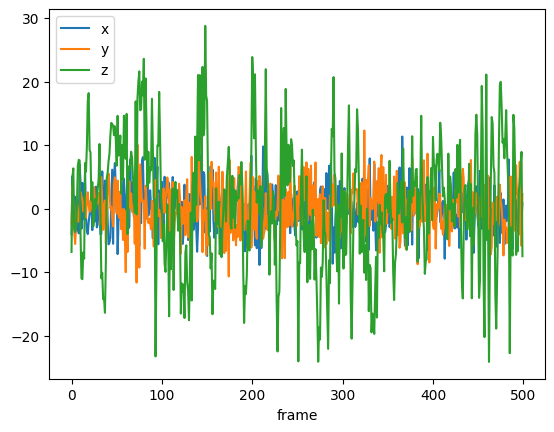

In [5]:
ang_vel.groupby('molecule_label').get_group(0).plot(x='frame',y=['x','y','z'])

<Axes: xlabel='frame'>

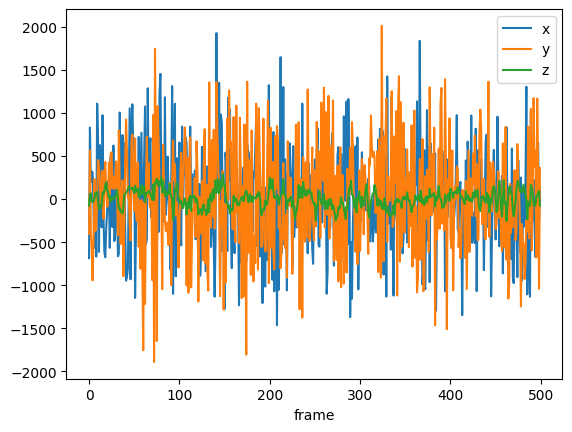

In [6]:
J_cart.groupby('molecule_label').get_group(0).plot(x='frame',y=['x','y','z'])

In [18]:
#Jacf_mean = J_acfs.groupby('frame').apply(np.mean,axis=0)
#Jacf_mean['time']=Jacf_mean['frame']*0.02

<Axes: xlabel='time'>

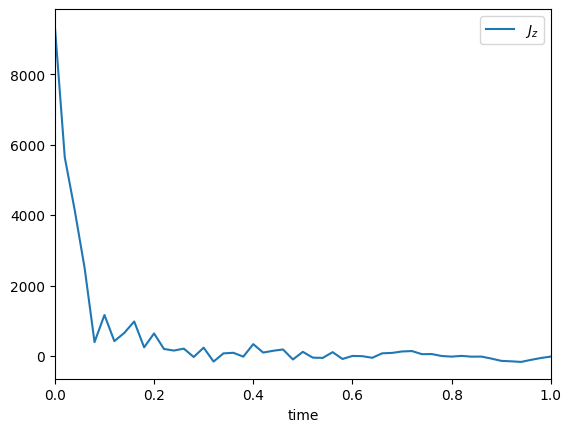

In [4]:
Jacf_mean.plot(x='time',y=['$J_{z}$'],xlim=(0,1))

<Axes: xlabel='time'>

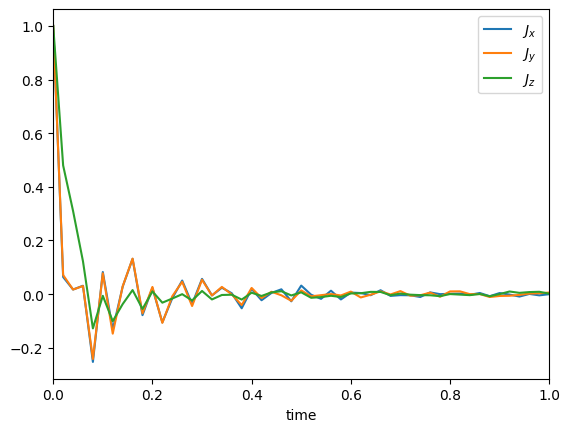

In [13]:
Jacf_norm = Jacf_mean.copy()
Jacf_norm[['$J_{x}$','$J_{y}$','$J_{z}$']] = Jacf_norm[['$J_{x}$','$J_{y}$','$J_{z}$']]/Jacf_norm.loc[0,['$J_{x}$','$J_{y}$','$J_{z}$']]
Jacf_norm.plot(x='time',y=['$J_{x}$','$J_{y}$','$J_{z}$'],xlim=(0,1))

In [14]:
Jacf_norm.head()

,Unnamed: 0,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule,time
frame,,,,,,,,
0,0.0,1.000000,1.000000,1.000000,0.0,4.5,4.5,0.00
1,0.0,0.056365,0.076430,0.469552,1.0,4.5,97.5,0.02
2,0.0,0.023253,0.028777,0.299593,2.0,4.5,190.5,0.04
3,0.0,0.029076,0.038498,0.129223,3.0,4.5,283.5,0.06
4,0.0,-0.277027,-0.268692,-0.124943,4.0,4.5,376.5,0.08


In [2]:
%run dynpy.py --SRrelax dynpy_params_methane.py

List of trajectories not provided. All will be parsed...
The following directories will be parsed as trajectories:
./example-data/tinker/methane/01



Continue? (Y/n) 


Explicit velocities not provided. Will be determined from position and timestep. If timestep is too large, these velocities will be inaccurate.
compute_atom_two                           --- 2.69 seconds ---
compute, classify, and label molecules     --- 1.56 seconds ---
group dataframes by molecule               --- 0.01 seconds ---
parallel compute angular vel,momentum      --- 14.83 seconds ---
parallel compute acfs                      --- 0.43 seconds ---
1/T1     =     0.0093 Hz
Total SR Run Time for ./example-data/tinker/methane/    --- 19.57 seconds ---
Total SR Run Time         --- 19.57 seconds ---


In [3]:
atom = pd.read_csv("./example-data/tinker/methane/01/methane-oplsaa-atom-table.csv")

In [5]:
u,vel = _prepared(atom,timestep=0.01,start_prod=100,end_prod=2100,celldm=45.9)

In [8]:
SR_module_main(u,vel,ParseDynamics,SpinRotation)

List of trajectories not provided. All will be parsed...
The following directories will be parsed as trajectories:
./example-data/tinker/methane/01



Continue? (Y/n) 


Explicit velocities not provided. Will be determined from position and timestep. If timestep is too large, these velocities will be inaccurate.
compute_atom_two                           --- 13.22 seconds ---
compute, classify, and label molecules     --- 36.21 seconds ---
group dataframes by molecule               --- 0.04 seconds ---
parallel compute angular vel,momentum      --- 151.04 seconds ---
parallel compute acfs                      --- 9.63 seconds ---
1/T1     =     0.0086 Hz
Total SR Run Time for ./example-data/tinker/methane/01    --- 210.30 seconds ---
Total SR Run Time         --- 210.30 seconds ---


In [3]:
import netCDF4
fp='../jerschow-trajectories/01/31_gpl_Prod_resume300.nc'
nc = netCDF4.Dataset(fp)

In [4]:
mol_sym = ['C']*5 + ['H']*4 + ['N'] + ['C'] + ['H']*3
all_sym = mol_sym*93
len(all_sym)

1302

In [5]:
0.02*50000

1000.0

In [6]:
all_vel = nc.variables['velocities'][:].data

In [7]:
nat = len(all_vel[0])

In [8]:
#import numpy as np
#all_vel = all_vel.reshape((50000*1302,3))

In [9]:
with open("../jerschow-trajectories/01/gpl-vel.xyz",'a') as f:
    for i,v in enumerate(all_vel):
        #if i<=1000:
            f.write(str(nat)+'\n\n')
            for j, line in enumerate(v):
                #print(line)
                f.write(all_sym[j] + '    ' + str(line).strip('[]')+'\n')

In [53]:
#SR_module_main(u,vel,ParseDynamics,SpinRotation)
!python dynpy.py --SRrelax dynpy_params.py

/bin/bash: line 1: y: command not found
List of trajectories not provided. All will be parsed...
The following directories will be parsed as trajectories:
../jerschow-trajectories/01

Continue? (Y/n)Traceback (most recent call last):
  File "dynpy.py", line 127, in <module>
    main()
  File "dynpy.py", line 118, in main
    us,vels = parseMD.PARSE_MD(PD)
  File "/mnt/e/Documents/Autschbach Research/dynpy/parseMD.py", line 29, in PARSE_MD
    user_time = which_trajs(PD)
  File "/mnt/e/Documents/Autschbach Research/dynpy/helper.py", line 26, in which_trajs
    user_time = user_confirm()
  File "/mnt/e/Documents/Autschbach Research/dynpy/helper.py", line 8, in user_confirm
    confirm = input('Continue? (Y/n)')
EOFError: EOF when reading a line


In [3]:
import exatomic
gpl = exatomic.XYZ.from_file("../jerschow-trajectories/01/gpl-mol.xyz")

[DEBUG 2024-04-09 16:52:29,994] exatomic.interfaces.xyz.XYZ contains 16 lines


In [4]:
ugpl = exatomic.XYZ.to_universe(gpl)

[DEBUG 2024-04-09 16:52:30,230] exatomic.core.atom.Atom shape: (14, 5)
[DEBUG 2024-04-09 16:52:30,231] exatomic.core.frame.Frame shape: (1, 1)
[INFO 2024-04-09 16:52:30,232] exatomic.core.universe.Universe adding 2 attrs


In [5]:
atom = pd.DataFrame(ugpl.atom.copy())

[DEBUG 2024-04-09 16:52:30,237] exatomic.core.atom.Atom shape: (14, 5)


In [6]:
atom.frame = atom.frame.astype(int)

In [13]:
atom.dtypes

symbol    category
x          float64
y          float64
z          float64
frame        int64
dtype: object

In [14]:
u,vel = _prepared(atom,timestep=0.001,start_prod=0,end_prod=0,celldm=45.9,units='bohr')

In [15]:
u,vel = prep_SR_uni1(u,vel,ParseDynamics,SpinRotation,skip_vel=True)

In [16]:
u,vel = prep_SR_uni2(u,vel,ParseDynamics,SpinRotation)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
14


In [22]:
u.atom_two[u.atom_two['bond']==True]

,dx,dy,dz,dr,atom0,atom1,projection,bond,molecule_label0,molecule_label1,molecule0,molecule1,frame,symbol0,symbol1,atom_label0,atom_label1,mol-atom_index0,mol-atom_index1
0,-0.881724,2.141400,1.250509,2.631882,0,1,16,True,0,0,0,0,0,C,C,0,1,0,1
4,2.272874,0.247957,-1.313813,2.636957,0,5,12,True,0,0,0,0,0,C,C,0,5,0,5
9,-1.418300,-2.462840,0.053494,2.842537,0,10,4,True,0,0,0,0,0,C,C,0,10,0,10
13,1.386065,2.230561,-0.111146,2.628485,1,2,13,True,0,0,0,0,0,C,C,1,2,1,2
17,-1.752044,-0.058612,1.055507,2.046262,1,6,4,True,0,0,0,0,0,C,H,1,6,1,6
25,2.169978,0.234147,-1.254275,2.517307,2,3,13,True,0,0,0,0,0,C,N,2,3,2,3
29,-0.672259,1.677344,0.968611,2.050273,2,7,13,True,0,0,0,0,0,C,H,2,7,2,7
34,0.846301,-2.050451,-1.200038,2.522036,3,4,12,True,0,0,0,0,0,N,C,3,4,3,4
40,-1.247746,-2.307700,0.001138,2.623423,4,5,10,True,0,0,0,0,0,C,C,4,5,4,5
43,1.768733,0.210720,-1.015168,2.050216,4,8,13,True,0,0,0,0,0,C,H,4,8,4,8


In [21]:
u.atom_two[u.atom_two['mol-atom_index0']==1]

,dx,dy,dz,dr,atom0,atom1,projection,bond,molecule_label0,molecule_label1,molecule0,molecule1,frame,symbol0,symbol1,atom_label0,atom_label1,mol-atom_index0,mol-atom_index1
13,1.386065,2.230561,-0.111146,2.628485,1,2,13,True,0,0,0,0,0,C,C,1,2,1,2
14,3.556043,2.464707,-1.365422,4.537026,1,3,13,False,0,0,0,0,0,C,N,1,3,1,3
15,4.402344,0.414256,-2.565460,5.112125,1,4,12,False,0,0,0,0,0,C,C,1,4,1,4
16,3.154597,-1.893443,-2.564322,4.484681,1,5,9,False,0,0,0,0,0,C,C,1,5,1,5
17,-1.752044,-0.058612,1.055507,2.046262,1,6,4,True,0,0,0,0,0,C,H,1,6,1,6
18,0.713806,3.907904,0.857465,4.064048,1,7,13,False,0,0,0,0,0,C,H,1,7,1,7
19,6.171076,0.624976,-3.580628,7.161961,1,8,12,False,0,0,0,0,0,C,H,1,8,1,8
20,3.952349,-3.481407,-3.580243,6.368626,1,9,9,False,0,0,0,0,0,C,H,1,9,1,9
21,-0.536576,-4.604240,-1.197015,4.787461,1,10,1,False,0,0,0,0,0,C,C,1,10,1,10
22,0.639245,-6.119617,-0.436907,6.168406,1,11,10,False,0,0,0,0,0,C,H,1,11,1,11


In [24]:
SpinRotation.methyl_indeces

[0, 10, 11, 12, 13]

In [25]:
mol_ax = mol_fixed_coord(u.atom_two,SpinRotation.mol_type,methyl_indeces=SpinRotation.methyl_indeces)

In [26]:
mol_ax

array([[-0.32718747, -0.80249093, -0.49895559],
       [ 0.20844016,  0.45372187, -0.8664232 ],
       [ 0.92168382, -0.3874852 ,  0.01881923]])

In [39]:
#"On-axis"
SR_cartmat = np.array([[-4.971, -8.568, 0.205],
            [-8.833, -15.260, 0.365],
             [0.181,  0.314, -0.016]])

In [36]:
#"Global"
#SR_cartmat = np.array([[-0.451,         -0.158,         0.029],
#            [-0.150,         -0.662,        -0.024],
#             [0.035,         -0.014,        -0.343]])

In [40]:
SR_cartmat.T

array([[ -4.971,  -8.833,   0.181],
       [ -8.568, -15.26 ,   0.314],
       [  0.205,   0.365,  -0.016]])

In [42]:
np.matmul(la.inv(mol_ax),np.matmul(SR_cartmat,mol_ax))

array([[-7.97733596e-03,  6.97573180e-04,  1.00066209e-01],
       [ 3.63055175e-04, -8.67207626e-03,  1.91436289e-01],
       [-5.44337298e-02, -3.11207979e-02, -2.02303506e+01]])

In [ ]:
200*(12.01+4*1.01)*1.66054e-24

(5.3303334e-21/0.372)**(1/3)

2.428867430793715e-07/5.2918e-9

24.29/0.529177

In [16]:
J_acfs

,Unnamed: 0,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
0,0,52.571444,29.638337,35.649802,2010,0,169
1,0,51.590316,28.837140,35.064601,2020,0,370
2,0,49.551196,27.517392,33.770802,2030,0,570
3,0,46.533468,25.716772,31.845895,2040,0,770
4,0,42.761753,23.416319,29.383890,2050,0,971
...,...,...,...,...,...,...,...
14995,0,-0.135994,-0.201888,0.041756,4960,49,59387
14996,0,-0.148365,-0.116815,0.040648,4970,49,59587
14997,0,-0.144266,-0.061301,0.034084,4980,49,59787
14998,0,-0.105929,-0.032671,0.022685,4990,49,59987


In [17]:
u,vel = prep_SR_uni1(u,vel,ParseDynamics,SpinRotation)

Explicit velocities not provided. Will be determined from position and timestep. If timestep is too large, these velocities will be inaccurate.


ValueError: need at least one array to concatenate

In [24]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification,molecule_label,mol-atom_index


In [13]:
u.compute_molecule()

In [14]:
u.molecule.classify(('H(4)C(1)','methane',True))
u.atom.loc[:,'classification'] = u.atom.molecule.map(u.molecule.classification)
u.atom = u.atom[u.atom['classification'] == SpinRotation.mol_type]

In [15]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification
2000000,C,16.106463,2.665951,13.437436,2000,0,3,12.010636,methane
2000001,H,16.904777,1.883718,11.711248,2000,1,3,1.007941,methane
2000002,H,14.897110,1.208667,14.363914,2000,2,3,1.007941,methane
2000003,H,15.090671,4.394341,12.970696,2000,3,3,1.007941,methane
2000004,H,17.727581,3.113384,14.637101,2000,4,3,1.007941,methane
...,...,...,...,...,...,...,...,...,...
2002995,C,17.454867,0.755080,5.874379,2002,995,605,12.010636,methane
2002996,H,18.534420,1.907823,7.209813,2002,996,605,1.007941,methane
2002997,H,18.087326,-1.198969,6.043176,2002,997,605,1.007941,methane
2002998,H,17.526695,1.379950,3.883451,2002,998,605,1.007941,methane


In [16]:
labels = pd.DataFrame(u.atom.groupby('molecule').apply(lambda x: tuple(x['label'])),columns=['mol_atom_labels'])
labels = labels[labels['mol_atom_labels']!=()]

In [17]:
molecule_labels = labels.groupby('mol_atom_labels').nunique().reset_index().reset_index().rename(columns={'index':'molecule_label'}).set_index('mol_atom_labels')

In [18]:
molecule_labels

,molecule_label
mol_atom_labels,
"(0, 1, 2, 3, 4)",0
"(5, 6, 7, 8, 9)",1
"(10, 11, 12, 13, 14)",2
"(15, 16, 17, 18, 19)",3
"(20, 21, 22, 23, 24)",4
...,...
"(975, 976, 977, 978, 979)",195
"(980, 981, 982, 983, 984)",196
"(985, 986, 987, 988, 989)",197


In [19]:
labels['molecule_label'] = labels.mol_atom_labels.map(molecule_labels.molecule_label)

In [21]:
labels.dtypes

mol_atom_labels    object
molecule_label      int64
dtype: object

In [24]:
u.atom['molecule_label'] = u.atom.molecule.map(labels.molecule_label).astype(int)

In [26]:
sets = u.atom.groupby('frame').apply(lambda x: set(list(x['molecule_label']))).values.tolist()

In [27]:
contiguos_molecules = set.intersection(*sets)

In [28]:
u.atom = u.atom[u.atom['molecule_label'].isin(contiguos_molecules)]

In [31]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification,molecule_label
2000000,C,16.106463,2.665951,13.437436,2000,0,3,12.010636,methane,0
2000001,H,16.904777,1.883718,11.711248,2000,1,3,1.007941,methane,0
2000002,H,14.897110,1.208667,14.363914,2000,2,3,1.007941,methane,0
2000003,H,15.090671,4.394341,12.970696,2000,3,3,1.007941,methane,0
2000004,H,17.727581,3.113384,14.637101,2000,4,3,1.007941,methane,0
...,...,...,...,...,...,...,...,...,...,...
2002995,C,17.454867,0.755080,5.874379,2002,995,605,12.010636,methane,199
2002996,H,18.534420,1.907823,7.209813,2002,996,605,1.007941,methane,199
2002997,H,18.087326,-1.198969,6.043176,2002,997,605,1.007941,methane,199
2002998,H,17.526695,1.379950,3.883451,2002,998,605,1.007941,methane,199


In [63]:
vel = pd.read_csv("./vel.csv")
#atom = pd.read_csv("./atom.csv")
vel

,Unnamed: 0,symbol,x,y,z,frame
0,0,O,0.343552D+01,0.164631D+01,-0.895100D+00,0
1,1,H,-0.694970D+01,0.207495D+02,-0.678917D-01,0
2,2,H,-0.531751D+02,0.185476D+02,0.242310D+02,0
3,3,O,0.285894D+01,0.646562D+01,0.326353D+01,0
4,4,H,0.198045D+02,0.911515D+01,0.229146D+01,0
...,...,...,...,...,...,...
6595,6595,H,0.169173D+02,0.716370D+01,0.290746D+02,10
6596,6596,H,-0.140890D+02,0.135674D+02,0.297809D+01,10
6597,6597,O,0.294320D+01,0.383972D+00,-0.397763D+01,10
6598,6598,H,-0.274846D+01,-0.822809D+01,0.125772D+02,10


In [17]:
from SRrax import correlate

In [19]:
J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])

C:\Users\Adam\AppData\Local\Temp\ipykernel_8480\2107077702.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])


,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
0,NaN,NaN,NaN,30000,1,0
1,NaN,NaN,NaN,30000,2,1
2,NaN,NaN,NaN,30010,1,61
3,NaN,NaN,NaN,30010,2,62
4,NaN,NaN,NaN,30020,1,123
...,...,...,...,...,...,...
397,NaN,NaN,NaN,31980,2,12038
398,NaN,NaN,NaN,31990,1,12097
399,NaN,NaN,NaN,31990,2,12098
400,NaN,NaN,NaN,32000,1,12157


In [57]:
vel

,atom,symbol,x,y,z,frame,label
0,600,O,-42.098948,111.295417,165.247620,1,0
1,601,H,-39.527389,104.223114,162.651325,1,1
2,602,H,-40.000198,104.374293,170.747944,1,2
3,603,O,-111.382685,-41.736073,-65.839010,1,3
4,604,H,-104.401174,-54.857704,-72.939102,1,4
...,...,...,...,...,...,...,...
5995,6595,H,-7.351907,75.578030,53.531096,10,595
5996,6596,H,-17.181113,71.479392,48.307069,10,596
5997,6597,O,-1.558505,-181.136709,83.911971,10,597
5998,6598,H,-0.541936,-187.608872,80.445976,10,598


In [58]:
atom

,atom,symbol,x,y,z,frame,label


In [46]:
vel['molecule'] = vel.index.map(atom['molecule'])

In [55]:
vel

,atom,x,y,z,frame,symbol,label,molecule
0,576000,-9.715625,0.915395,0.384324,30010,O,0,0.0
1,576001,-0.598988,-8.296343,9.754943,30010,H,1,0.0
2,576002,-2.933537,-3.503136,3.121120,30010,H,2,0.0
3,576003,-11.223066,-1.955803,-0.894785,30010,O,3,1.0
4,576004,9.731307,-4.580917,-15.700483,30010,H,4,1.0
...,...,...,...,...,...,...,...,...
38395,614395,0.940950,0.958078,-2.122938,32000,H,187,NaN
38396,614396,-29.337230,-3.261558,-7.062871,32000,H,188,NaN
38397,614397,70.524246,11.781382,3.033590,32000,O,189,NaN
38398,614398,6.479746,-18.157718,-38.550089,32000,H,190,NaN


In [28]:
acf = pd.read_csv("example-data/tinker/water/vapor/101kpa/01/Jacfs_all.csv")

In [29]:
mean_acf = acf.groupby("frame").apply(np.mean,axis=0)

<Axes: xlabel='frame'>

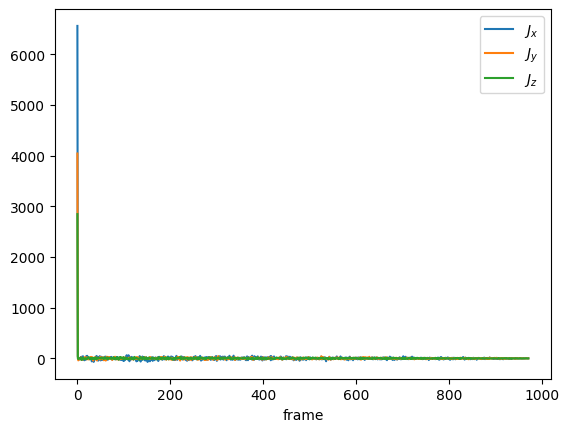

In [30]:
mean_acf.plot(x='frame',y=['$J_{x}$','$J_{y}$','$J_{z}$'])